In [1]:
import matplotlib.pyplot as plt
from plotting_functions.plotting_structure import combine_experiments
from plotting_functions.boxplots import boxplot_at_molt, boxplot_larval_stage
import warnings
# Configure warnings
warnings.filterwarnings("once")

In [2]:
filemap_paths = [
    "/mnt/towbin.data/shared/kstojanovski/20240202_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240202_171239_051/analysis_sacha/report/analysis_filemap_annotated.csv",
    # "/mnt/towbin.data/shared/kstojanovski/20240212_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240212_164059_429/analysis_sacha/report/analysis_filemap_annotated.csv",
]

conditions_paths = [
    "/mnt/towbin.data/shared/kstojanovski/20240202_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240202_171239_051/doc/conditions.yaml",
    # "/mnt/towbin.data/shared/kstojanovski/20240212_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240212_164059_429/doc/conditions.yaml",
]

organ_channels = [{'body': 'ch2', 'pharynx' : 'ch1'}]
# 

# backup_path = "/mnt/towbin.data/shared/igheor/20250208_Ti2_10x_suppressor_screen_daf16_160_186_344_338_25C_20250208_204911_158/plotting_backups/"

# filemap_backup_path = os.path.join(backup_path, "filemaps")
# conditions_backup_path = os.path.join(backup_path, "conditions")
# structure_backup_path = os.path.join(backup_path, "structure")

# os.makedirs(backup_path, exist_ok=True)
# os.makedirs(filemap_backup_path, exist_ok=True)
# os.makedirs(conditions_backup_path, exist_ok=True)
# os.makedirs(structure_backup_path, exist_ok=True)

In [3]:
import pickle
conditions_struct = combine_experiments(filemap_paths, conditions_paths, organ_channels=organ_channels, recompute_values_at_molt=False)

# # backup the conditions struct
# with open(os.path.join(structure_backup_path, "plotting_struct.pkl"), "wb") as f:
#     pickle.dump(conditions_struct, f)

In [4]:
for condition in conditions_struct:
    print(f"Condition: {condition['condition_id'], {condition['description']}}, Number of individuals: {condition['ecdysis_time_step'].shape[0]}")

Condition: (0, {'WT yap-1, no TIR, 500uM IAA'}), Number of individuals: 31
Condition: (1, {'WT yap-1, col-10:TIR, 500uM IAA'}), Number of individuals: 24
Condition: (2, {'yap-1 (tm1416), no TIR, 500uM IAA'}), Number of individuals: 55
Condition: (3, {'yap-1 (tm1416), col-10:TIR, 500uM IAA'}), Number of individuals: 51
Condition: (4, {'yap-1 (abt7), no TIR, 500uM IAA'}), Number of individuals: 48
Condition: (5, {'yap-1 (abt7), col-10:TIR, 500uM IAA'}), Number of individuals: 95


In [5]:
# change figure size to your liking
plt.rcParams['figure.figsize'] = [12, 10]

# make lines thicker
plt.rcParams['lines.linewidth'] = 2

# make font size bigger
plt.rcParams.update({'font.size': 12})

Color palette: ['red', 'green', 'purple']


/home/spsalmon/towbintools_pipeline/analysis_and_plots/plotting_functions/boxplots.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


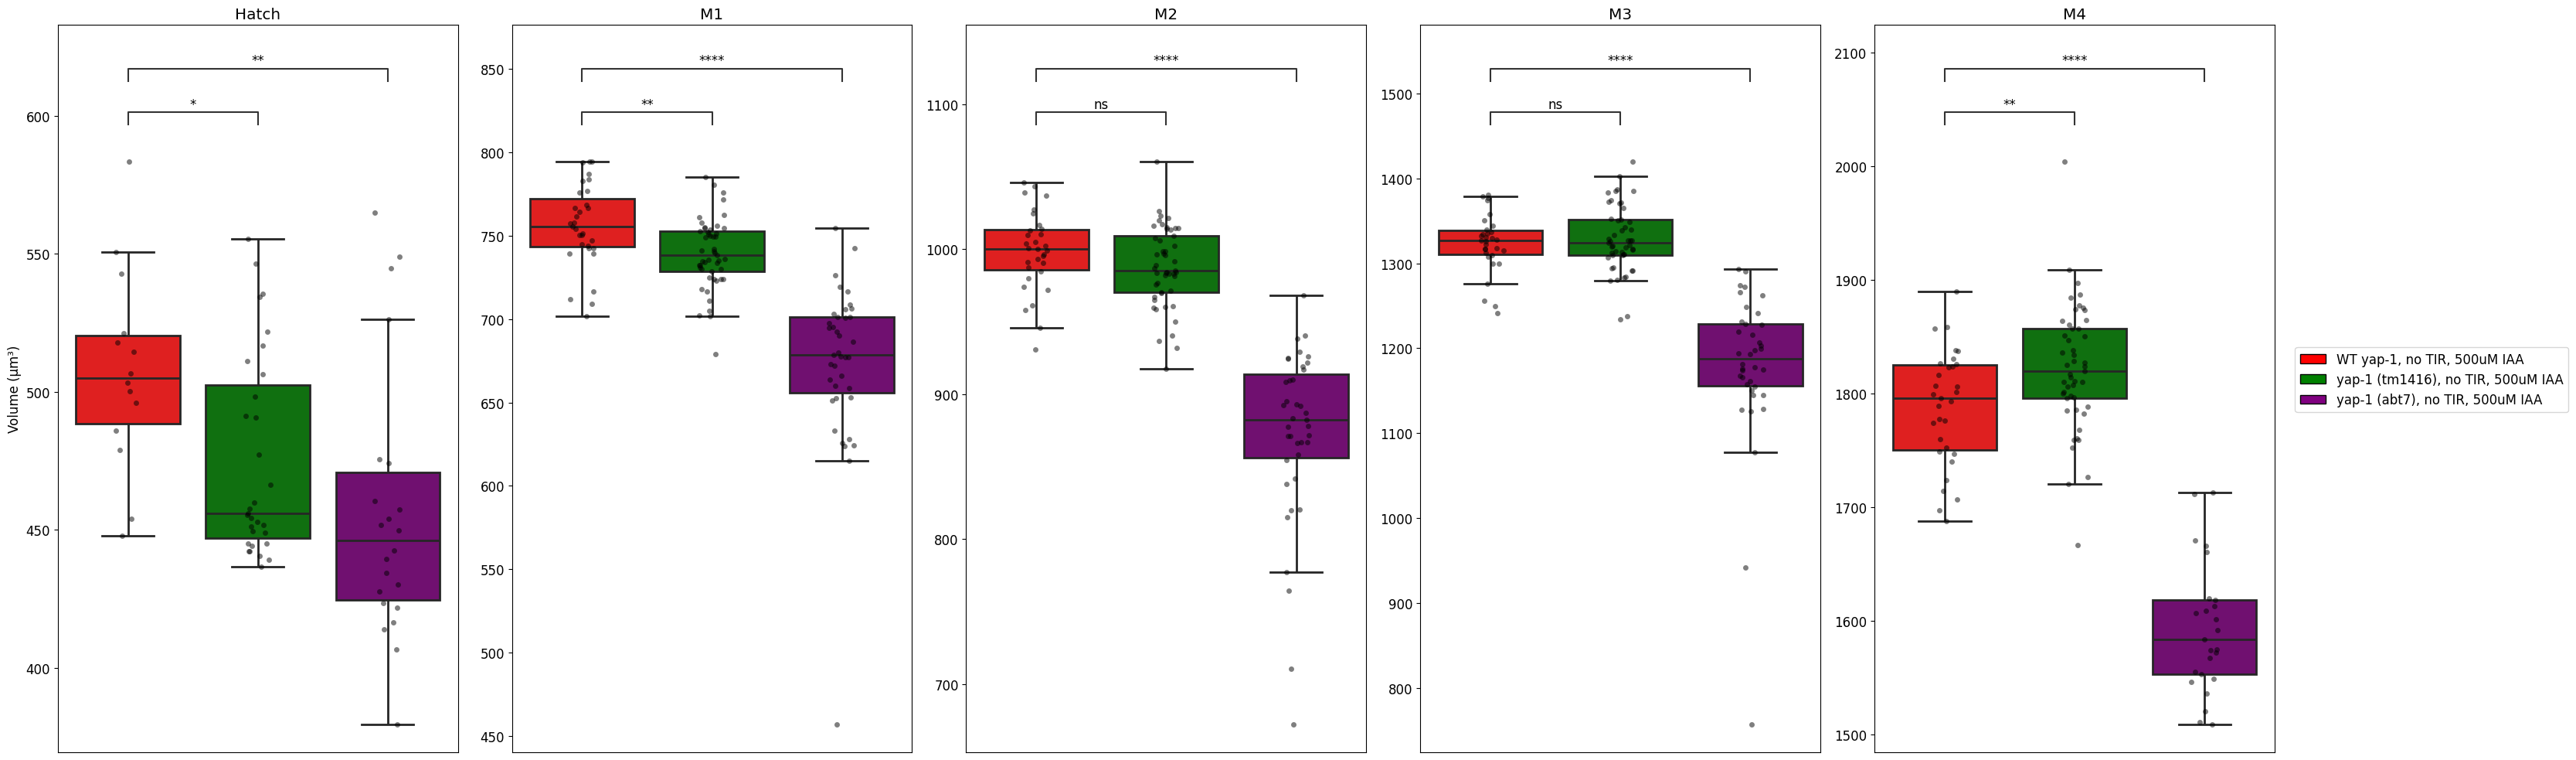

In [6]:
conditions_to_plot = [0, 2, 4]
significance_pairs = [(0, 2), (0,4)]
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple', 5: 'pink', 6: 'brown', 7: 'gray', 8: 'cyan', 9: 'magenta'}

fig = boxplot_at_molt(conditions_struct, 'pharynx_seg_str_volume_at_ecdysis', conditions_to_plot, colors=colors, plot_significance=True, significance_pairs = significance_pairs, log_scale = False, legend = {'description': ''}, y_axis_label='Volume (µm³)', titles = ['Hatch', 'M1', 'M2', 'M3', 'M4'])

/home/spsalmon/towbintools_pipeline/analysis_and_plots/plotting_functions/boxplots.py:253: RuntimeWarning: All-NaN slice encountered
  aggregated_data_of_stage = np.nanmedian(data_of_stage, axis=1)
/home/spsalmon/towbintools_pipeline/analysis_and_plots/plotting_functions/boxplots.py:276: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


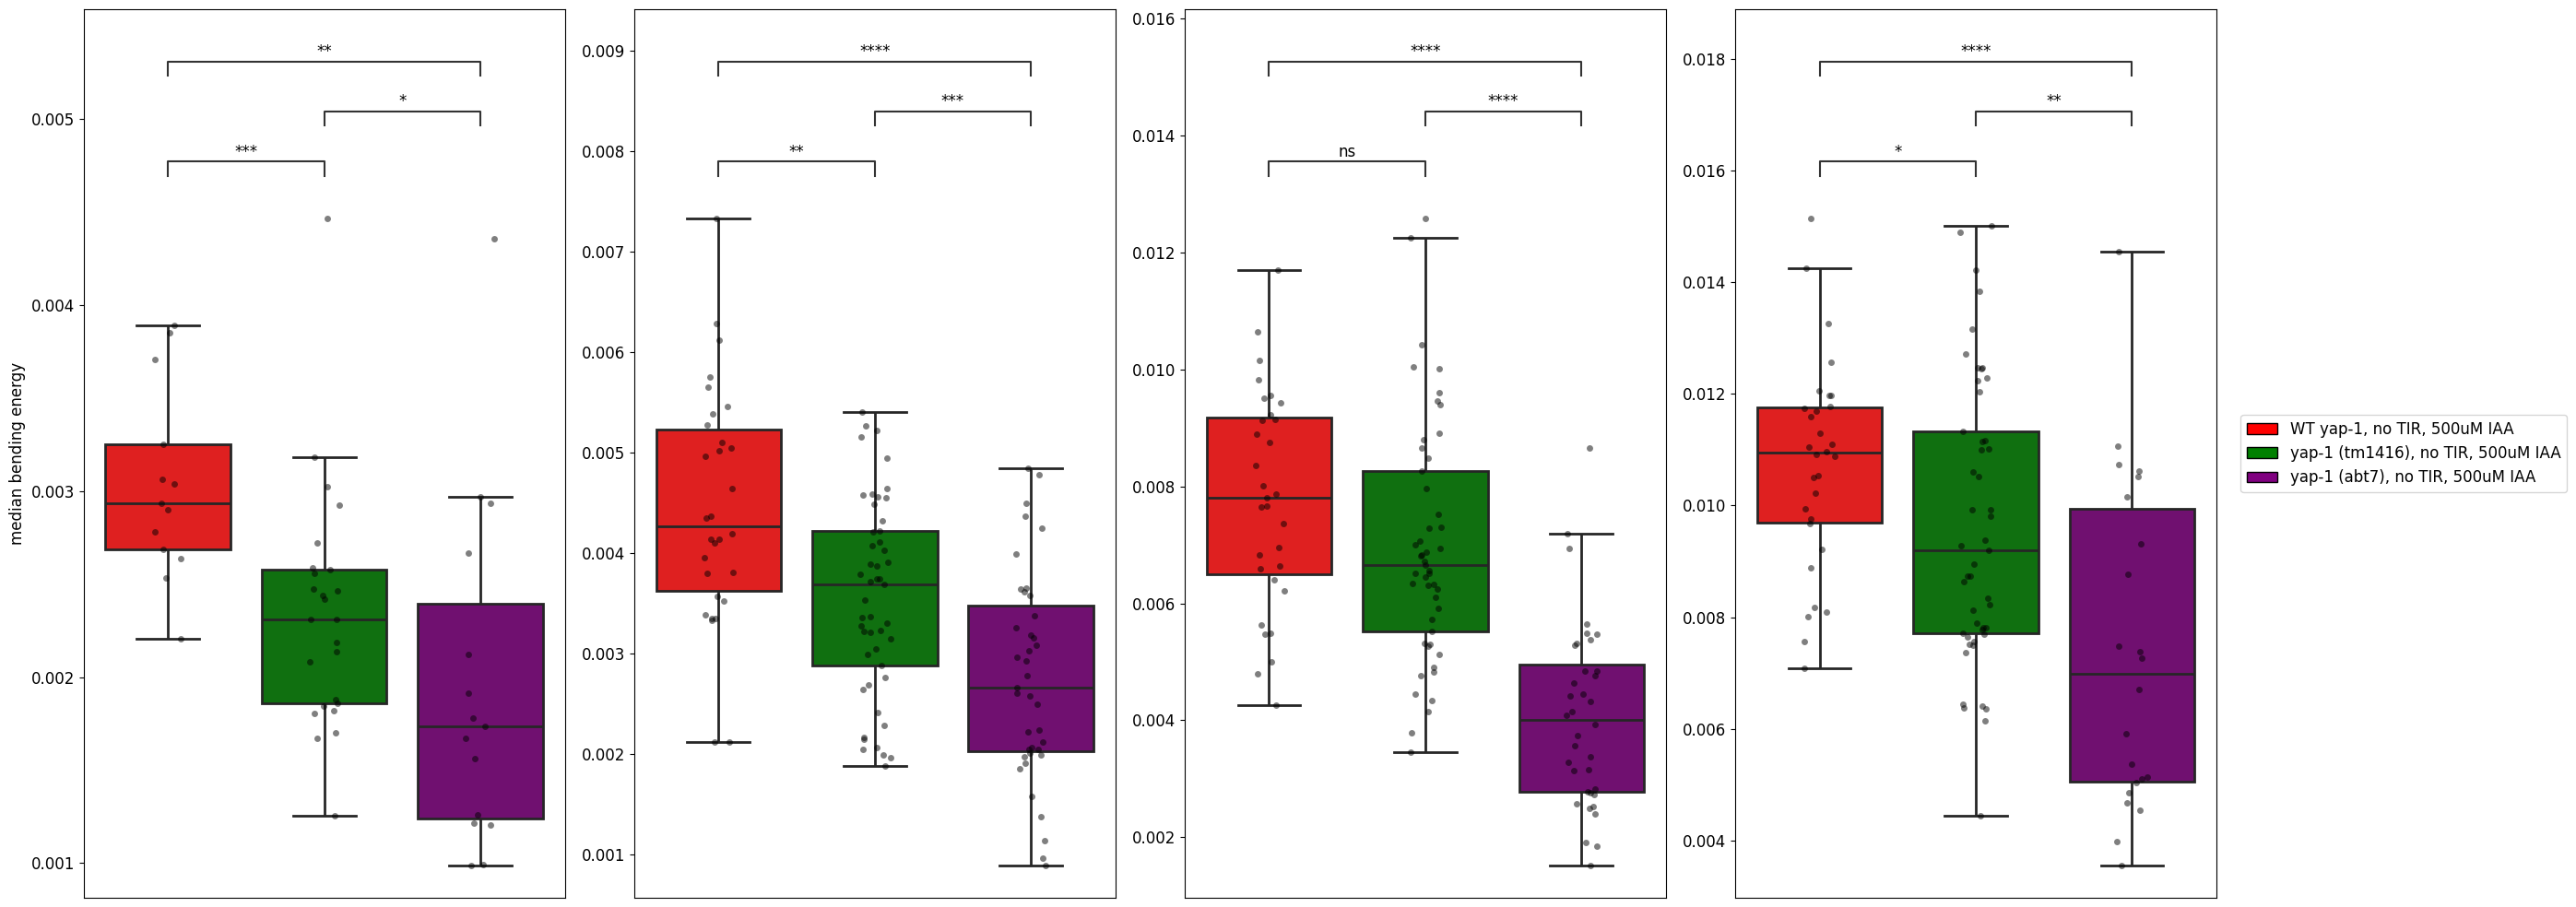

In [8]:
fig = boxplot_larval_stage(conditions_struct, 'pharynx_seg_bending_energy', conditions_to_plot, colors=colors, aggregation='median', n_points=100, log_scale=False, plot_significance=True, y_axis_label='median bending energy', legend={'description': ''})